In [1]:
import pandas as pd

def read_csv_file(file_path):
    try:
        df = pd.read_csv(file_path)
        df = df.infer_objects()
        return df
    except FileNotFoundError:
        print("Error: File not found!")
    except Exception as e:
        print(f"Error: An unknown error occurred: {e}")
    return None


In [4]:
life_df = read_csv_file('../dataset/original_data/country_life.csv')
per_gdp_df = read_csv_file('../dataset/original_data/per_gdp.csv')

def code_to_country(code):
    try:
        country = pycountry.countries.get(alpha_3=code)
        if country:
            return country.name
    except LookupError:
        return None
life_df_2010 = life_df[['Country Code', '2010']]
life_df_2010
gdp_df_2010 =  per_gdp_df[['Country Code', '2010']]
merged_df = pd.merge(life_df_2010, gdp_df_2010, on='Country Code', suffixes=('_life', '_gdp'))
merged_df.loc[:,'Country'] = merged_df['Country Code'].apply(code_to_country)
merged_df

Country Code  2010_life      2010_gdp       Country
0            ABW  75.404000  24093.140151         Aruba
1            AFE  58.410316   1601.727748          None
2            AFG  60.851000    560.621505   Afghanistan
3            AFW  54.500466   1647.149847          None
4            AGO  56.726000   3597.342932        Angola
..           ...        ...           ...           ...
253          XKX  77.630000   2987.545196          None
254          YEM  67.280000   1155.203053         Yemen
255          ZAF  58.899000   7973.471958  South Africa
256          ZMB  56.799000   1451.106160        Zambia
257          ZWE  50.652000    901.554444      Zimbabwe

[258 rows x 4 columns]

In [6]:
import pygwalker as pyg
pyg.walk(merged_df, env='Jupyter')  

In [7]:
vis_spec = r"""{"config":[{"config":{"defaultAggregated":false,"geoms":["circle"],"coordSystem":"generic","limit":0,"timezoneDisplayOffset":0,"folds":["2010_life"]},"encodings":{"dimensions":[{"fid":"Country Code","name":"Country Code","basename":"Country Code","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"Country","name":"Country","basename":"Country","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"gw_paint_fid","analyticType":"dimension","name":"Paint Field","semanticType":"nominal","computed":true,"expression":{"op":"paint","as":"gw_paint_fid","params":[{"type":"newmap","value":{"dict":{"1":{"name":"L_1","color":"#4c78a8"},"2":{"name":"L_2","color":"#f58518"},"3":{"name":"L_3","color":"#e45756"},"4":{"name":"L_4","color":"#72b7b2"},"5":{"name":"L_5","color":"#54a24b"},"6":{"name":"L_6","color":"#eeca3b"},"7":{"name":"L_7","color":"#b279a2"},"8":{"name":"L_8","color":"#ff9da6"},"9":{"name":"L_9","color":"#9d755d"},"10":{"name":"L_10","color":"#bab0ac"}},"facets":[{"map":"Y2AAgf9wgghArDrytf7HyyVbHD8AAA==","dimensions":[{"domain":{"type":"nominal","value":["ABW","AFE","AFG","AFW","AGO","ALB","AND","ARB","ARE","ARG","ARM","ASM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BMU","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CEB","CHE","CHI","CHL","CHN","CIV","CMR","COD","COG","COL","COM","CPV","CRI","CSS","CUB","CUW","CYM","CYP","CZE","DEU","DJI","DMA","DNK","DOM","DZA","EAP","EAR","EAS","ECA","ECS","ECU","EGY","EMU","ERI","ESP","EST","ETH","EUU","FCS","FIN","FJI","FRA","FRO","FSM","GAB","GBR","GEO","GHA","GIB","GIN","GMB","GNB","GNQ","GRC","GRD","GRL","GTM","GUM","GUY","HIC","HKG","HND","HPC","HRV","HTI","HUN","IBD","IBT","IDA","IDB","IDN","IDX","IMN","IND","INX","IRL","IRN","IRQ","ISL","ISR","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KNA","KOR","KWT","LAC","LAO","LBN","LBR","LBY","LCA","LCN","LDC","LIC","LIE","LKA","LMC","LMY","LSO","LTE","LTU","LUX","LVA","MAC","MAF","MAR","MCO","MDA","MDG","MDV","MEA","MEX","MHL","MIC","MKD","MLI","MLT","MMR","MNA","MNE","MNG","MNP","MOZ","MRT","MUS","MWI","MYS","NAC","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NRU","NZL","OED","OMN","OSS","PAK","PAN","PER","PHL","PLW","PNG","POL","PRE","PRI","PRK","PRT","PRY","PSE","PSS","PST","PYF","QAT","ROU","RUS","RWA","SAS","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SMR","SOM","SRB","SSA","SSD","SSF","SST","STP","SUR","SVK","SVN","SWE","SWZ","SXM","SYC","SYR","TCA","TCD","TEA","TEC","TGO","THA","TJK","TKM","TLA","TLS","TMN","TON","TSA","TSS","TTO","TUN","TUR","TUV","TZA","UGA","UKR","UMC","URY","USA","UZB","VCT","VEN","VGB","VIR","VNM","VUT","WLD","WSM","XKX","YEM","ZAF","ZMB","ZWE"],"width":266},"fid":"Country Code"}],"usedColor":[1,255]}],"usedColor":[1,255]}}]}},{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"}],"measures":[{"fid":"2010_life","name":"2010_life","basename":"2010_life","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"2010_gdp","name":"2010_gdp","basename":"2010_gdp","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"gw_count_fid","name":"Row count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","computed":true,"expression":{"op":"one","params":[],"as":"gw_count_fid"}},{"fid":"gw_mea_val_fid","name":"Measure values","analyticType":"measure","semanticType":"quantitative","aggName":"sum"}],"rows":[{"fid":"2010_gdp","name":"2010_gdp","basename":"2010_gdp","analyticType":"measure","semanticType":"quantitative","aggName":"mean","offset":0}],"columns":[{"fid":"2010_life","name":"2010_life","basename":"2010_life","analyticType":"measure","semanticType":"quantitative","aggName":"mean","offset":0}],"color":[{"fid":"Country Code","name":"Country Code","basename":"Country Code","semanticType":"nominal","analyticType":"dimension","offset":0}],"opacity":[],"size":[],"shape":[],"radius":[],"theta":[],"longitude":[],"latitude":[],"geoId":[],"details":[],"filters":[{"fid":"gw_paint_fid","analyticType":"dimension","name":"Paint Field","semanticType":"nominal","computed":true,"expression":{"op":"paint","as":"gw_paint_fid","params":[{"type":"newmap","value":{"dict":{"1":{"name":"L_1","color":"#4c78a8"},"2":{"name":"L_2","color":"#f58518"},"3":{"name":"L_3","color":"#e45756"},"4":{"name":"L_4","color":"#72b7b2"},"5":{"name":"L_5","color":"#54a24b"},"6":{"name":"L_6","color":"#eeca3b"},"7":{"name":"L_7","color":"#b279a2"},"8":{"name":"L_8","color":"#ff9da6"},"9":{"name":"L_9","color":"#9d755d"},"10":{"name":"L_10","color":"#bab0ac"}},"facets":[{"map":"Y2AAgf9wgghArDrytf7HyyVbHD8AAA==","dimensions":[{"domain":{"type":"nominal","value":["ABW","AFE","AFG","AFW","AGO","ALB","AND","ARB","ARE","ARG","ARM","ASM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BMU","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CEB","CHE","CHI","CHL","CHN","CIV","CMR","COD","COG","COL","COM","CPV","CRI","CSS","CUB","CUW","CYM","CYP","CZE","DEU","DJI","DMA","DNK","DOM","DZA","EAP","EAR","EAS","ECA","ECS","ECU","EGY","EMU","ERI","ESP","EST","ETH","EUU","FCS","FIN","FJI","FRA","FRO","FSM","GAB","GBR","GEO","GHA","GIB","GIN","GMB","GNB","GNQ","GRC","GRD","GRL","GTM","GUM","GUY","HIC","HKG","HND","HPC","HRV","HTI","HUN","IBD","IBT","IDA","IDB","IDN","IDX","IMN","IND","INX","IRL","IRN","IRQ","ISL","ISR","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KNA","KOR","KWT","LAC","LAO","LBN","LBR","LBY","LCA","LCN","LDC","LIC","LIE","LKA","LMC","LMY","LSO","LTE","LTU","LUX","LVA","MAC","MAF","MAR","MCO","MDA","MDG","MDV","MEA","MEX","MHL","MIC","MKD","MLI","MLT","MMR","MNA","MNE","MNG","MNP","MOZ","MRT","MUS","MWI","MYS","NAC","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NRU","NZL","OED","OMN","OSS","PAK","PAN","PER","PHL","PLW","PNG","POL","PRE","PRI","PRK","PRT","PRY","PSE","PSS","PST","PYF","QAT","ROU","RUS","RWA","SAS","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SMR","SOM","SRB","SSA","SSD","SSF","SST","STP","SUR","SVK","SVN","SWE","SWZ","SXM","SYC","SYR","TCA","TCD","TEA","TEC","TGO","THA","TJK","TKM","TLA","TLS","TMN","TON","TSA","TSS","TTO","TUN","TUR","TUV","TZA","UGA","UKR","UMC","URY","USA","UZB","VCT","VEN","VGB","VIR","VNM","VUT","WLD","WSM","XKX","YEM","ZAF","ZMB","ZWE"],"width":266},"fid":"Country Code"}],"usedColor":[1,255]}],"usedColor":[1,255]}}]},"rule":{"type":"not in","value":[""]}}],"text":[]},"layout":{"showActions":false,"showTableSummary":false,"stack":"stack","interactiveScale":false,"zeroScale":false,"size":{"mode":"fixed","width":533,"height":423},"format":{},"geoKey":"name","resolve":{"x":false,"y":false,"color":false,"opacity":false,"shape":false,"size":false},"scaleIncludeUnmatchedChoropleth":false,"showAllGeoshapeInChoropleth":false,"colorPalette":"","useSvg":false,"scale":{"opacity":{},"size":{}}},"visId":"gw_cq2m","name":"Chart 1"}],"chart_map":{},"workflow_list":[{"workflow":[{"type":"transform","transform":[{"key":"gw_paint_fid","expression":{"op":"paint","as":"gw_paint_fid","params":[{"type":"newmap","value":{"facets":[{"dimensions":[{"domain":{"type":"nominal","value":["ABW","AFE","AFG","AFW","AGO","ALB","AND","ARB","ARE","ARG","ARM","ASM","ATG","AUS","AUT","AZE","BDI","BEL","BEN","BFA","BGD","BGR","BHR","BHS","BIH","BLR","BLZ","BMU","BOL","BRA","BRB","BRN","BTN","BWA","CAF","CAN","CEB","CHE","CHI","CHL","CHN","CIV","CMR","COD","COG","COL","COM","CPV","CRI","CSS","CUB","CUW","CYM","CYP","CZE","DEU","DJI","DMA","DNK","DOM","DZA","EAP","EAR","EAS","ECA","ECS","ECU","EGY","EMU","ERI","ESP","EST","ETH","EUU","FCS","FIN","FJI","FRA","FRO","FSM","GAB","GBR","GEO","GHA","GIB","GIN","GMB","GNB","GNQ","GRC","GRD","GRL","GTM","GUM","GUY","HIC","HKG","HND","HPC","HRV","HTI","HUN","IBD","IBT","IDA","IDB","IDN","IDX","IMN","IND","INX","IRL","IRN","IRQ","ISL","ISR","ITA","JAM","JOR","JPN","KAZ","KEN","KGZ","KHM","KIR","KNA","KOR","KWT","LAC","LAO","LBN","LBR","LBY","LCA","LCN","LDC","LIC","LIE","LKA","LMC","LMY","LSO","LTE","LTU","LUX","LVA","MAC","MAF","MAR","MCO","MDA","MDG","MDV","MEA","MEX","MHL","MIC","MKD","MLI","MLT","MMR","MNA","MNE","MNG","MNP","MOZ","MRT","MUS","MWI","MYS","NAC","NAM","NCL","NER","NGA","NIC","NLD","NOR","NPL","NRU","NZL","OED","OMN","OSS","PAK","PAN","PER","PHL","PLW","PNG","POL","PRE","PRI","PRK","PRT","PRY","PSE","PSS","PST","PYF","QAT","ROU","RUS","RWA","SAS","SAU","SDN","SEN","SGP","SLB","SLE","SLV","SMR","SOM","SRB","SSA","SSD","SSF","SST","STP","SUR","SVK","SVN","SWE","SWZ","SXM","SYC","SYR","TCA","TCD","TEA","TEC","TGO","THA","TJK","TKM","TLA","TLS","TMN","TON","TSA","TSS","TTO","TUN","TUR","TUV","TZA","UGA","UKR","UMC","URY","USA","UZB","VCT","VEN","VGB","VIR","VNM","VUT","WLD","WSM","XKX","YEM","ZAF","ZMB","ZWE"],"width":266},"fid":"Country Code"}],"map":"Y2AAgf9wgghArDrytf7HyyVbHD8AAA=="}],"dict":{"1":{"name":"L_1"},"255":{"name":""}}}}]}}]},{"type":"filter","filters":[{"fid":"gw_paint_fid","rule":{"type":"not in","value":[""]}}]},{"type":"view","query":[{"op":"raw","fields":["Country Code","2010_life","2010_gdp"]}]}]}],"version":"0.4.9.15"}"""
pyg.walk(merged_df, spec=vis_spec)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006331e75fb6bacQ0KriFDNLRbzBIUM" style="height: auto">\n    <hea…

In [20]:
import pandas as pd
import pycountry

def is_valid_country(name):
    try:
        pycountry.countries.lookup(name)
        return True
    except LookupError:
        return False

def code_to_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except (LookupError, AttributeError):
        return None

def name_to_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

def preprocess_data(df, id_type='code', threshold=5):
    """
    通用预处理函数
    :param id_type: 标识类型 'code' 或 'name'
    :param threshold: 缺失值阈值
    """
    df = df.copy()
    
    # 处理标识列
    if id_type == 'name':
        df['Country Code'] = df['Country Name'].apply(name_to_code)
        df = df.dropna(subset=['Country Code'])
    elif id_type == 'code':
        df['Country Name'] = df['Country Code'].apply(code_to_name)
        df = df.dropna(subset=['Country Name'])
    
    # 删除缺失过多的行
    df = df.dropna(thresh=df.shape[1]-threshold)
    return df

# 读取并处理各数据集
# --------------------------------------------------
# 1. 预期寿命数据
life_df = pd.read_csv('../dataset/original_data/country_life.csv')
life_df = life_df[['Country Code', '2020']].rename(columns={'2020': 'country_life'})
life_df = preprocess_data(life_df, id_type='code')

# 2. 人均GDP数据
per_gdp = pd.read_csv('../dataset/original_data/per_gdp.csv')
per_gdp = per_gdp[['Country Code', '2020']].rename(columns={'2020': 'per_GDP'})
per_gdp = preprocess_data(per_gdp, id_type='code')

# 3. 人口数据
population = pd.read_csv('../dataset/original_data/population.csv')
population = population[['Country Name', '2020']].rename(columns={'2020': 'population'})
population = preprocess_data(population, id_type='name')

# 4. 卫生支出总额
health_exp = pd.read_csv('../dataset/original_data/health_expenditure.csv')
health_exp = health_exp[['Country Name', '2020']].rename(columns={'2020': 'Health_Expenditure'})
health_exp = preprocess_data(health_exp, id_type='name')

# 5. 公共资金来源占比
public_health = pd.read_csv('../dataset/original_data/国内公共来源资助的当前健康支出的份额_country_year.csv')
public_health = public_health[['Country Name', '2020']].rename(columns={'2020': 'health_spending'})
public_health = preprocess_data(public_health, id_type='name')

# 合并所有数据集
# --------------------------------------------------
# 先合并代码型数据
merged = pd.merge(life_df, per_gdp, on=['Country Code', 'Country Name'])

# 再合并名称型数据
datasets = [population, health_exp, public_health]
for df in datasets:
    merged = pd.merge(
        merged, 
        df,
        on=['Country Name', 'Country Code'],
        how='inner'
    )

# 最终列排序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending'
]
merged = merged[final_columns]

print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 7)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  
0           15.533614         7.636423  
1            3.220706        52.794914  
2            7.519203        39.846012  
3            5.824770        60.986095  
4           10.347015        63.984512

In [21]:
# 导出为CSV文件（假设你想保存到'processed_data'目录）
output_path = '../dataset/processed_data/merged_health_indicators_2020.csv'
merged.to_csv(output_path, index=False, encoding='utf-8-sig')  # utf-8-sig支持中文列名

print(f"数据已成功导出至: {output_path}")

数据已成功导出至: ../dataset/processed_data/merged_health_indicators_2020.csv


In [22]:
crime_rate_df = pd.read_csv('../dataset/original_data/crime_rate.csv')
print("文件列名：", crime_rate_df.columns.tolist())

文件列名： ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [23]:
# 新增犯罪率数据处理（添加到原有代码末尾）
# --------------------------------------------------
# 6. 读取犯罪率数据
crime_rate_df = pd.read_csv('../dataset/original_data/crime_rate.csv')
crime_rate_df = crime_rate_df[['Country Code', '2020']].rename(columns={'2020': 'crime_rate'})

# 预处理（确保国家代码有效）
crime_rate_df = preprocess_data(crime_rate_df, id_type='code', threshold=1)

# 合并到主数据集
merged = pd.merge(
    merged,
    crime_rate_df[['Country Code', 'Country Name', 'crime_rate']],
    on=['Country Code', 'Country Name'],
    how='left'  # 保留所有原有国家的数据，即使犯罪率缺失
)

# 检查合并结果
print(f"合并后数据维度：{merged.shape}")
print("犯罪率缺失值数量：", merged['crime_rate'].isnull().sum())

# 最终列排序（新增crime_rate）
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending', 'crime_rate'
]
merged = merged[final_columns]

print(f"最终数据维度：{merged.shape}")
merged.head()

合并后数据维度：(165, 8)
犯罪率缺失值数量： 0
最终数据维度：(165, 8)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate  
0           15.533614         7.636423    6.594439  
1            3.220706        52.794914    6.542876  
2            7.519203        39.846012    2.127772  
3            5.824770        60.986095    0.699881  
4           10.347015        63.984512    5.366814

In [24]:
import pandas as pd

# 读取数据
df = pd.read_csv('../dataset/original_data/data.csv')

# 提取括号前的数字（假设格式为 "数字 [范围]"）
df['First Tooltip'] = df['First Tooltip'] = df['First Tooltip'].str.split(r' \[', n=1).str[0]

# 保存结果
df.to_csv('../dataset/original_data/Suicide rate.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/original_data/data.csv'

In [14]:
import pandas as pd
import pycountry

# --------------------------
# 1. 读取并预处理自杀率数据
# --------------------------
suicide_df = pd.read_csv('../dataset/original_data/suicide rate.csv')

# 选择需要的列并重命名
suicide_df = suicide_df[['Country Name', 'First Tooltip']].rename(columns={
    'First Tooltip': 'suicide_rate'
})

suicide_df = preprocess_data(suicide_df, id_type='name', threshold=1)

# --------------------------
# 2. 合并到主表
# --------------------------
# 确保国家名称格式一致（去除空格和统一大小写）
merged['Country Name'] = merged['Country Name'].str.strip().str.title()
suicide_df['Country Name'] = suicide_df['Country Name'].str.strip().str.title()

# 执行合并
merged = pd.merge(
    merged,
    suicide_df[['Country Name', 'suicide_rate']],
    on='Country Name',
    how='left'
)

# --------------------------
# 3. 处理缺失值和最终输出
# --------------------------
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending', 
    'crime_rate', 'suicide_rate'
]

# 确保所有需要的列都存在
merged = merged.reindex(columns=final_columns)

print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 9)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate  suicide_rate  
0           15.533614         7.636423    6.594439           3.5  
1            3.220706        52.794914    6.542876           7.4  
2            7.519203        39.846012    2.127772           3.4  
3            5.824770        60.986095    0.699881           2.4  
4           10.347015        63.984512    5.366814           8.1

In [15]:
# 读取 CSV 文件
uhc_df = pd.read_csv('../dataset/original_data/uhc.csv')

# 只保留 DIM_SEX 列值为 "total" 的行
uhc_df = uhc_df[uhc_df['DIM_TIME'] == 2021]

# 保存处理后的数据（可选）
uhc_df.to_csv('../dataset/original_data/UHC.csv', index=False)

In [16]:
# --------------------------
# 1. 读取并预处理UHC数据
# --------------------------
uhc_df = pd.read_csv('../dataset/original_data/UHC.csv')

# 筛选2021年数据（假设DIM_TIME列存在）
uhc_df = uhc_df[uhc_df['DIM_TIME'].astype(str) == '2021']

# 选择需要的列并重命名
uhc_df = uhc_df[['Country Name', 'INDEX_N']].rename(columns={
    'INDEX_N': 'UHC_index'  # 统一命名风格
})

uhc_df = preprocess_data(uhc_df, id_type='name', threshold=1)

# --------------------------
# 2. 合并到主表
# --------------------------
# 确保国家名称格式一致
merged['Country Name'] = merged['Country Name'].str.strip().str.title()
uhc_df['Country Name'] = uhc_df['Country Name'].str.strip().str.title()

# 执行合并
merged = pd.merge(
    merged,
    uhc_df[['Country Name', 'UHC_index']],
    on='Country Name',
    how='left'
)

# --------------------------
# 3. 处理缺失值和最终输出
# --------------------------
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending', 
    'crime_rate', 'suicide_rate', 'UHC_index'
]

# 确保所有列都存在
merged = merged.reindex(columns=final_columns)

print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 10)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate  suicide_rate  UHC_index  
0           15.533614         7.636423    6.594439           3.5       41.0  
1            3.220706        52.794914    6.542876           7.4       37.0  
2            7.519203        39.846012    2.127772           3.4       64.0  
3            5.824770        60.986095    0.699881           2.4       82.0  
4           10.347015        63.984512    5.366814           8.1       79.0

In [28]:
# 读取 CSV 文件
air_df = pd.read_csv('../dataset/original_data/PM2.5.csv')

# 只保留 DIM_SEX 列值为 "total" 的行
air_df = air_df[air_df['DIM_DEG_URB'] == 'TOTAL']
air_df = air_df[air_df['DIM_TIME'] == 2019]

# 保存处理后的数据（可选）
air_df.to_csv('../dataset/original_data/air.csv', index=False)

In [29]:
import pandas as pd
import pycountry

# --------------------------
# 1. 读取并预处理空气质量数据
# --------------------------
air_df = pd.read_csv('../dataset/original_data/air.csv')

# 选择需要的列并重命名
air_df = air_df[['Country Name', 'RATE_N']].rename(columns={
    'RATE_N': 'PM2.5'  # 更直观的列名
})

air_df = preprocess_data(air_df, id_type='name', threshold=1)

# --------------------------
# 2. 合并到主表
# --------------------------
# 确保国家名称格式一致（去除空格并首字母大写）
merged['Country Name'] = merged['Country Name'].str.strip().str.title()
air_df['Country Name'] = air_df['Country Name'].str.strip().str.title()

# 执行合并（保留所有原有国家）
merged = pd.merge(
    merged,
    air_df[['Country Name', 'PM2.5']],
    on='Country Name',
    how='left'
)

# --------------------------
# 3. 处理缺失值和最终输出
# --------------------------
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending', 
    'crime_rate', 'suicide_rate', 'UHC_index', 'PM2.5'
]

# 确保列存在（自动处理列缺失情况）
merged = merged.reindex(columns=[col for col in final_columns if col in merged.columns])

print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 9)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate     PM2.5  
0           15.533614         7.636423    6.594439  62.48616  
1            3.220706        52.794914    6.542876  27.16477  
2            7.519203        39.846012    2.127772  16.27997  
3            5.824770        60.986095    0.699881  41.74950  
4           10.347015        63.984512    5.366814  12.04087

In [30]:
output_path = '../dataset/processed_data/final_merged_with_all_indicators.csv'
merged.to_csv(output_path, index=False, encoding='utf-8-sig')

## 基尼系数数据处理

In [31]:
# 读取数据
from chardet import detect

# 1. 检测原始文件编码
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        return detect(f.read(10000))['encoding']

original_encoding = detect_encoding('../dataset/original_data/jini.csv')
print(f"原始文件编码: {original_encoding}")

# 2. 按正确编码读取
df = pd.read_csv('../dataset/original_data/jini.csv', encoding=original_encoding)

# 1. 准备年份列 --------------------------------------------------
year_cols = [col for col in df.columns if col.isdigit()]
year_cols_sorted = sorted(year_cols, key=lambda x: int(x))

# 2. 处理2020列缺失值 --------------------------------------------
if '2020' not in df.columns:
    df['2020'] = pd.NA

def fill_2020(row):
    if pd.notna(row['2020']):
        return row['2020']
    valid_years = [int(col) for col in year_cols_sorted if pd.notna(row[col]) and col != '2020']
    return row[str(max(valid_years))] if valid_years else pd.NA

df['2020'] = df.apply(fill_2020, axis=1)

# 3. 清理数据并保存 ----------------------------------------------
all_year_cols = year_cols_sorted + ['2020']
df = df.dropna(subset=all_year_cols, how='all')

output_path = '../dataset/original_data/processed_gini_with_2020.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

原始文件编码: UTF-8-SIG


In [32]:
# 读取已处理的基尼系数文件
gini_df = pd.read_csv('../dataset/original_data/processed_gini_with_2020.csv')

# 选择需要的列并重命名
gini_df = gini_df[['Country Code', '2020']].rename(columns={
    '2020': 'Gini'  # 将年份列重命名为直观的指标名
})

# 检查数据
print("基尼系数数据预览:")
print(gini_df.head())

基尼系数数据预览:
  Country Code  Gini
0          AGO  51.3
1          ALB  29.4
2          ARE  26.4
3          ARG  42.7
4          ARM  25.1


In [33]:
# 确保国家代码格式一致（去除空格/统一大小写）
merged['Country Code'] = merged['Country Code'].str.strip().str.upper()
gini_df['Country Code'] = gini_df['Country Code'].str.strip().str.upper()

# 执行合并（左连接保留所有原有数据）
merged = pd.merge(
    merged,
    gini_df,
    on='Country Code',
    how='left'
)
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending',
    'crime_rate', 'suicide_rate', 'UHC_index', 'PM2.5', 'Gini'
]

# 确保列存在（避免因合并失败报错）
merged = merged.reindex(columns=[col for col in final_columns if col in merged.columns])
print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 10)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate     PM2.5  Gini  
0           15.533614         7.636423    6.594439  62.48616   NaN  
1            3.220706        52.794914    6.542876  27.16477  51.3  
2            7.519203        39.846012    2.127772  16.27997  29.4  
3            5.824770        60.986095    0.699881  41.74950  26.4  
4           10.347015        63.984512    5.366814  12.04087  42.7

In [34]:
merged.to_csv('final_merged_with_all_indicators.csv', index=False, encoding='utf-8-sig')

## 贫穷人口比例数据处理

In [35]:
original_encoding = detect_encoding('../dataset/original_data/poor_people.csv')
print(f"原始文件编码: {original_encoding}")

# 2. 按正确编码读取
df = pd.read_csv('../dataset/original_data/poor_people.csv', encoding=original_encoding)

# 1. 准备年份列 --------------------------------------------------
year_cols = [col for col in df.columns if col.isdigit()]
year_cols_sorted = sorted(year_cols, key=lambda x: int(x))

# 2. 处理2020列缺失值 --------------------------------------------
if '2020' not in df.columns:
    df['2020'] = pd.NA

df['2020'] = df.apply(fill_2020, axis=1)

# 3. 清理数据并保存 ----------------------------------------------
all_year_cols = year_cols_sorted + ['2020']
df = df.dropna(subset=all_year_cols, how='all')

output_path = '../dataset/original_data/processed_poor_people_2020.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

原始文件编码: UTF-8-SIG


In [36]:
# 读取已处理的基尼系数文件
poor_df = pd.read_csv('../dataset/original_data/processed_poor_people_2020.csv')

# 选择需要的列并重命名
poor_df = poor_df[['Country Code', '2020']].rename(columns={
    '2020': 'Poor_people'  # 将年份列重命名为直观的指标名
})

# 检查数据
print(poor_df.head())

  Country Code  Poor_people
0          AFG         54.5
1          AGO         32.3
2          ALB         22.0
3          ARG         42.0
4          ARM         27.0


In [37]:
# 确保国家代码格式一致（去除空格/统一大小写）
merged['Country Code'] = merged['Country Code'].str.strip().str.upper()
poor_df['Country Code'] = poor_df['Country Code'].str.strip().str.upper()

# 执行合并（左连接保留所有原有数据）
merged = pd.merge(
    merged,
    poor_df,
    on='Country Code',
    how='left'
)
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending',
    'crime_rate', 'suicide_rate', 'UHC_index', 'PM2.5', 'Gini','Poor_people'
]

# 确保列存在（避免因合并失败报错）
merged = merged.reindex(columns=[col for col in final_columns if col in merged.columns])
print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 11)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate     PM2.5  Gini  \
0           15.533614         7.636423    6.594439  62.48616   NaN   
1            3.220706        52.794914    6.542876  27.16477  51.3   
2            7.519203        39.846012    2.127772  16.27997  29.4   
3            5.824770        60.986095    0.699881  41.74950  26.4   
4           10.347015        63.984512    5.366814  12.04087  42.7   

   Poor_people  
0         54.5  
1         32.3  
2         22.0  
3          NaN  
4         42.0

## 失业率数据处理

In [38]:
original_encoding = detect_encoding('../dataset/original_data/lose_job.csv')
print(f"原始文件编码: {original_encoding}")

# 2. 按正确编码读取
df = pd.read_csv('../dataset/original_data/lose_job.csv', encoding=original_encoding)

# 1. 准备年份列 --------------------------------------------------
year_cols = [col for col in df.columns if col.isdigit()]
year_cols_sorted = sorted(year_cols, key=lambda x: int(x))

# 2. 处理2020列缺失值 --------------------------------------------
if '2020' not in df.columns:
    df['2020'] = pd.NA

df['2020'] = df.apply(fill_2020, axis=1)

# 3. 清理数据并保存 ----------------------------------------------
all_year_cols = year_cols_sorted + ['2020']
df = df.dropna(subset=all_year_cols, how='all')

output_path = '../dataset/original_data/processed_lose_job_2020.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

原始文件编码: UTF-8-SIG


In [39]:
# 读取已处理的基尼系数文件
lose_df = pd.read_csv('../dataset/original_data/processed_lose_job_2020.csv')

# 选择需要的列并重命名
lose_df = lose_df[['Country Code', '2020']].rename(columns={
    '2020': 'Lose_job'  # 将年份列重命名为直观的指标名
})

# 检查数据
print(lose_df.head())

  Country Code  Lose_job
0          ABW   8.90000
1          AFG  11.71000
2          AFW   3.16432
3          AGO  14.12400
4          ALB  11.63900


In [40]:
# 确保国家代码格式一致（去除空格/统一大小写）
merged['Country Code'] = merged['Country Code'].str.strip().str.upper()
lose_df['Country Code'] = lose_df['Country Code'].str.strip().str.upper()

# 执行合并（左连接保留所有原有数据）
merged = pd.merge(
    merged,
    lose_df,
    on='Country Code',
    how='left'
)
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending',
    'crime_rate', 'suicide_rate', 'UHC_index', 'PM2.5', 'Gini','Poor_people','Lose_job'
]

# 确保列存在（避免因合并失败报错）
merged = merged.reindex(columns=[col for col in final_columns if col in merged.columns])
print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 12)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate     PM2.5  Gini  \
0           15.533614         7.636423    6.594439  62.48616   NaN   
1            3.220706        52.794914    6.542876  27.16477  51.3   
2            7.519203        39.846012    2.127772  16.27997  29.4   
3            5.824770        60.986095    0.699881  41.74950  26.4   
4           10.347015        63.984512    5.366814  12.04087  42.7   

   Poor_people  Lose_job  
0         54.5    11.710  
1         32.3    14.124  
2         22.0    11.639  
3          NaN     4.294  
4         42.0    11.461

## 高等院校入学率数据处理

In [41]:
original_encoding = detect_encoding('../dataset/original_data/education.csv')
print(f"原始文件编码: {original_encoding}")

# 2. 按正确编码读取
df = pd.read_csv('../dataset/original_data/education.csv', encoding=original_encoding)

# 1. 准备年份列 --------------------------------------------------
year_cols = [col for col in df.columns if col.isdigit()]
year_cols_sorted = sorted(year_cols, key=lambda x: int(x))

# 2. 处理2020列缺失值 --------------------------------------------
if '2020' not in df.columns:
    df['2020'] = pd.NA

df['2020'] = df.apply(fill_2020, axis=1)

# 3. 清理数据并保存 ----------------------------------------------
all_year_cols = year_cols_sorted + ['2020']
df = df.dropna(subset=all_year_cols, how='all')

output_path = '../dataset/original_data/processed_education_2020.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

原始文件编码: UTF-8-SIG


In [42]:
# 读取已处理的基尼系数文件
education_df = pd.read_csv('../dataset/original_data/processed_education_2020.csv')

# 选择需要的列并重命名
education_df = education_df[['Country Code', '2020']].rename(columns={
    '2020': 'education'  # 将年份列重命名为直观的指标名
})

# 检查数据
print(education_df.head())

  Country Code  education
0          ABW   17.56378
1          AFE    8.94729
2          AFG   10.85844
3          AFW   10.13946
4          AGO    9.91085


In [43]:
# 确保国家代码格式一致（去除空格/统一大小写）
merged['Country Code'] = merged['Country Code'].str.strip().str.upper()
education_df['Country Code'] = education_df['Country Code'].str.strip().str.upper()

# 执行合并（左连接保留所有原有数据）
merged = pd.merge(
    merged,
    education_df,
    on='Country Code',
    how='left'
)
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending',
    'crime_rate', 'suicide_rate', 'UHC_index', 'PM2.5', 'Gini','Poor_people','Lose_job','education'
]

# 确保列存在（避免因合并失败报错）
merged = merged.reindex(columns=[col for col in final_columns if col in merged.columns])
print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 13)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate     PM2.5  Gini  \
0           15.533614         7.636423    6.594439  62.48616   NaN   
1            3.220706        52.794914    6.542876  27.16477  51.3   
2            7.519203        39.846012    2.127772  16.27997  29.4   
3            5.824770        60.986095    0.699881  41.74950  26.4   
4           10.347015        63.984512    5.366814  12.04087  42.7   

   Poor_people  Lose_job  education  
0         54.5    11.710  10.858440  
1         32.3    14.124   9.910850  
2         22.0    11.639  61.585300  
3          NaN     4.294  55.754051  
4         42.0    11.461  99.266228

In [44]:
merged.to_csv('final_merged_with_all_indicators.csv', index=False, encoding='utf-8-sig')

In [45]:
file_path = '../dataset/original_data/World_Sucide_rates.csv'  # 若与脚本同目录，直接使用文件名即可
df = pd.read_csv(file_path)

# 筛选出 2020 年的数据
df_2020 = df[(df['Period'] == 2019) & (df['Dim1'] == 'Both sexes')]
df_2020.to_csv("suicides_rate.csv", index=False)

In [46]:
# 读取已处理的基尼系数文件
sucide_df = pd.read_csv('../dataset/original_data/suicides_rate.csv')

# 选择需要的列并重命名
sucide_df = sucide_df[['Country Code', 'FactValueNumeric']].rename(columns={
    'FactValueNumeric': 'sucide'  # 将年份列重命名为直观的指标名
})

# 检查数据
print(sucide_df.head())

  Country Code  sucide
0          BRB    0.31
1          ATG    0.32
2          GRD    0.64
3          VCT    1.01
4          JOR    1.98


In [47]:
# 确保国家代码格式一致（去除空格/统一大小写）
merged['Country Code'] = merged['Country Code'].str.strip().str.upper()
sucide_df['Country Code'] = sucide_df['Country Code'].str.strip().str.upper()

# 执行合并（左连接保留所有原有数据）
merged = pd.merge(
    merged,
    sucide_df,
    on='Country Code',
    how='left'
)
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending',
    'crime_rate', 'suicide_rate', 'UHC_index', 'PM2.5', 'Gini','Poor_people','Lose_job','education','sucide'
]

# 确保列存在（避免因合并失败报错）
merged = merged.reindex(columns=[col for col in final_columns if col in merged.columns])
print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 14)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate     PM2.5  Gini  \
0           15.533614         7.636423    6.594439  62.48616   NaN   
1            3.220706        52.794914    6.542876  27.16477  51.3   
2            7.519203        39.846012    2.127772  16.27997  29.4   
3            5.824770        60.986095    0.699881  41.74950  26.4   
4           10.347015        63.984512    5.366814  12.04087  42.7   

   Poor_people  Lose_job  education  sucide  
0         54.5    11.710  10.858440    5.96  
1         32.3    14.124   9.910850   12.55  
2         22.0    11.639  61.585300    3.72  
3          NaN     4.294  55.754051    5.24  
4         42.0    11.461  99.266228    8.14

In [48]:
merged.to_csv('final_merged_with_all_indicators.csv', index=False, encoding='utf-8-sig')

## HDI

In [58]:
file_path = '../dataset/original_data/hdi.csv'  # 若与脚本同目录，直接使用文件名即可
df = pd.read_csv(file_path)

# 筛选出 2020 年的数据
df_2020 = df[(df['Year'] == 2017)]
df_2020.to_csv("hdi_2017.csv", index=False)

In [51]:
# 读取已处理的基尼系数文件
hdi_df = pd.read_csv('../dataset/original_data/hdi_2017.csv')

# 选择需要的列并重命名
hdi_df = hdi_df[['Country Code', 'Human Development Index (UNDP)']].rename(columns={
    'Human Development Index (UNDP)': 'hdi'  # 将年份列重命名为直观的指标名
})

# 检查数据
print(hdi_df.head())

  Country Code    hdi
0          AFG  0.498
1          ALB  0.785
2          DZA  0.754
3          AND  0.858
4          AGO  0.581


In [84]:
merged.head()

Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063    39068979   
1                Angola          AGO        62.261   1449.922867    33451132   
2               Albania          ALB        76.989   5370.778623     2837849   
3  United Arab Emirates          ARE        78.946  37173.875410     9401038   
4             Argentina          ARG        75.892   8535.599380    45191965   

   Health_Expenditure  health_spending  crime_rate  suicide_rate  UHC_index  \
0           15.533614         7.636423    6.594439           3.5         41   
1            3.220706        52.794914    6.542876           7.4         37   
2            7.519203        39.846012    2.127772           3.4         64   
3            5.824770        60.986095    0.699881           2.4         82   
4           10.347015        63.984512    5.366814           8.1         79   

      PM2.5  Gini  Poor_people  Lose_job  education  sucide  
0  17.70003  35.2         54.5    11.710  10.858440    5.96  
1  27.16477  51.3         32.3    14.124   9.910850   12.55  
2  16.27997  29.4         22.0    11.639  61.585300    3.72  
3  41.74950  26.4         21.9     4.294  55.754051    5.24  
4  12.04087  42.7         42.0    11.461  99.266228    8.14

In [52]:
print("merged原有列:", merged.columns.tolist())
print("hdi_df的列:", hdi_df.columns.tolist())

merged原有列: ['Country Name', 'Country Code', 'country_life', 'per_GDP', 'population', 'Health_Expenditure', 'health_spending', 'crime_rate', 'PM2.5', 'Gini', 'Poor_people', 'Lose_job', 'education', 'sucide']
hdi_df的列: ['Country Code', 'hdi']


In [53]:
# 确保国家代码格式一致（去除空格/统一大小写）
merged['Country Code'] = merged['Country Code'].str.strip().str.upper()
hdi_df['Country Code'] = hdi_df['Country Code'].str.strip().str.upper()

# 执行合并（左连接保留所有原有数据）
merged = pd.merge(
    merged,
    hdi_df,
    on='Country Code',
    how='left'
)
# 定义目标列顺序
final_columns = [
    'Country Name', 'Country Code', 'country_life', 'per_GDP',
    'population', 'Health_Expenditure', 'health_spending',
    'crime_rate', 'suicide_rate', 'UHC_index', 'PM2.5', 'Gini','Poor_people','Lose_job','education','sucide','hdi'
]

# 确保列存在（避免因合并失败报错）
merged = merged.reindex(columns=[col for col in final_columns if col in merged.columns])
print(f"最终数据维度：{merged.shape}")
merged.head()

最终数据维度：(165, 15)


Country Name Country Code  country_life       per_GDP  population  \
0           Afghanistan          AFG        62.575    510.787063  39068979.0   
1                Angola          AGO        62.261   1449.922867  33451132.0   
2               Albania          ALB        76.989   5370.778623   2837849.0   
3  United Arab Emirates          ARE        78.946  37173.875410   9401038.0   
4             Argentina          ARG        75.892   8535.599380  45191965.0   

   Health_Expenditure  health_spending  crime_rate     PM2.5  Gini  \
0           15.533614         7.636423    6.594439  62.48616   NaN   
1            3.220706        52.794914    6.542876  27.16477  51.3   
2            7.519203        39.846012    2.127772  16.27997  29.4   
3            5.824770        60.986095    0.699881  41.74950  26.4   
4           10.347015        63.984512    5.366814  12.04087  42.7   

   Poor_people  Lose_job  education  sucide    hdi  
0         54.5    11.710  10.858440    5.96  0.498  
1         32.3    14.124   9.910850   12.55  0.581  
2         22.0    11.639  61.585300    3.72  0.785  
3          NaN     4.294  55.754051    5.24  0.863  
4         42.0    11.461  99.266228    8.14  0.825

In [54]:
merged.to_csv('final_merged_with_all_indicators.csv', index=False, encoding='utf-8-sig')

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

merged = merged.dropna(subset=['per_GDP', 'suicide_rate'])  # 删除缺失值

# 2. 计算统计量
corr, p_value = stats.pearsonr(merged['per_GDP'], merged['suicide_rate'])

# 3. 绘制图形
plt.figure(figsize=(12, 7))
sns.regplot(
    x='per_GDP',
    y='suicide_rate',
    data=merged,
    scatter_kws={'s':100, 'alpha':0.6, 'color':'#2980b9'},
    line_kws={'color':'#c0392b', 'lw':2},
    ci=95
)

# 4. 添加统计标注
plt.text(
    0.6, 0.15,
    f'Pearson r = {corr:.2f}\np < {p_value:.3f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

# 5. 美化图形
plt.xscale('log')
plt.xticks([1000, 5000, 10000, 50000], ['1k', '5k', '10k', '50k'])
plt.title('人均GDP与自杀率的关系（对数尺度）', fontsize=16, pad=20)
plt.xlabel('人均GDP（美元，对数尺度）', fontsize=12)
plt.ylabel('自杀率（每10万人）', fontsize=12)
sns.despine()

plt.tight_layout()
plt.savefig('GDP_suicide_scatter.png', dpi=300)
plt.show()

KeyError: ['suicide_rate']

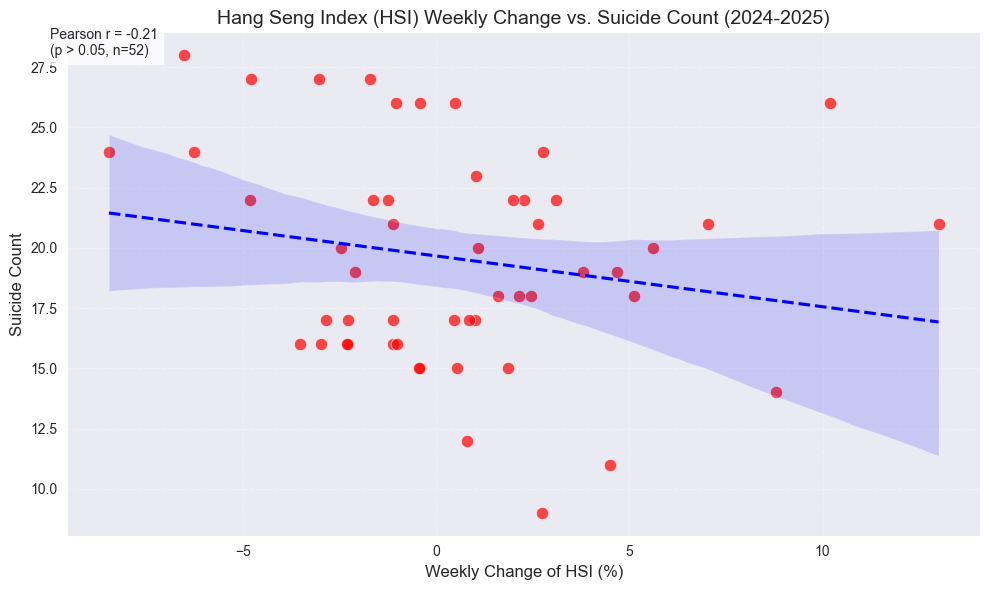

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (adjust path if needed)
data = pd.read_csv('../dataset/original_data/香港恒生指数历史数据.csv', encoding='utf-8-sig')

# Clean data: Convert percentage to float (e.g., "-8.47%" → -8.47)
data['涨跌幅'] = data['涨跌幅'].str.replace('%', '').astype(float)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='涨跌幅', 
    y='自杀人数', 
    data=data, 
    color='red', 
    s=80, 
    alpha=0.7
)

# Add trend line
sns.regplot(
    x='涨跌幅', 
    y='自杀人数', 
    data=data, 
    scatter=False, 
    line_kws={'color': 'blue', 'linestyle': '--'}
)

# Set labels and title (in English)
plt.xlabel('Weekly Change of HSI (%)', fontsize=12)
plt.ylabel('Suicide Count', fontsize=12)
plt.title('Hang Seng Index (HSI) Weekly Change vs. Suicide Count (2024-2025)', fontsize=14)

# Add correlation annotation
plt.text(
    x=-10, y=28, 
    s=f'Pearson r = -0.21\n(p > 0.05, n={len(data)})', 
    fontsize=10, 
    bbox=dict(facecolor='white', alpha=0.8)
)

# Adjust grid and layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

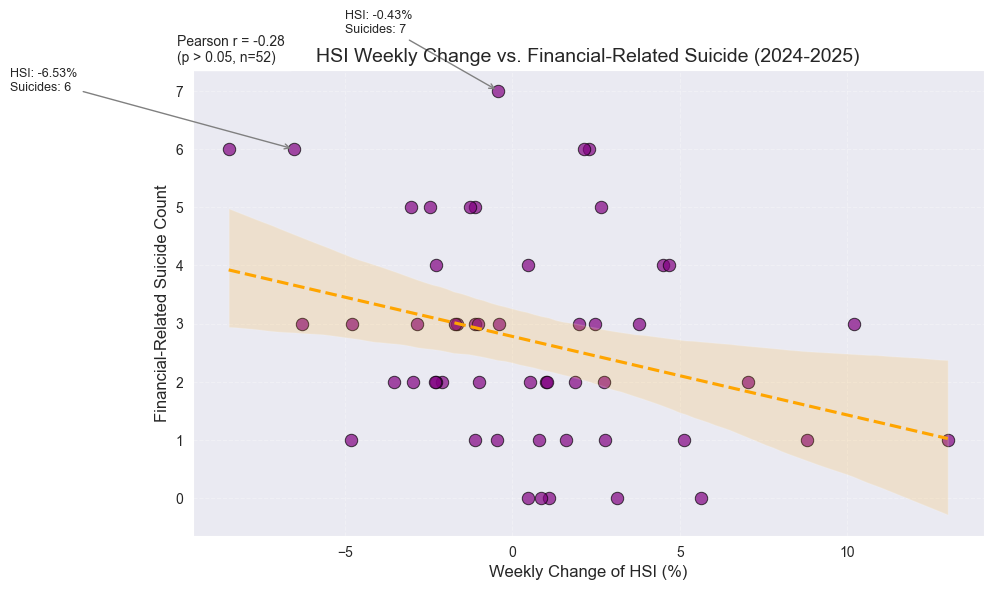

In [57]:
try:
    data['涨跌幅'] = data['涨跌幅'].astype(str).str.replace('%', '').astype(float)
except Exception as e:
    print(f"清理失败: {e}")
    # 尝试修复2：直接转换（假设已是数值）
    data['涨跌幅'] = data['涨跌幅'].astype(float)

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='涨跌幅', 
    y='因财政自杀人数', 
    data=data, 
    color='purple',
    s=80, 
    alpha=0.7,
    edgecolor='black'
)

# Add trend line
sns.regplot(
    x='涨跌幅', 
    y='因财政自杀人数', 
    data=data, 
    scatter=False, 
    line_kws={'color': 'orange', 'linestyle': '--'}
)

# Set labels and title (in English)
plt.xlabel('Weekly Change of HSI (%)', fontsize=12)
plt.ylabel('Financial-Related Suicide Count', fontsize=12)
plt.title('HSI Weekly Change vs. Financial-Related Suicide (2024-2025)', fontsize=14)

# Annotate key outliers
plt.annotate(
    'HSI: -0.43%\nSuicides: 7', 
    xy=(-0.43, 7), 
    xytext=(-5, 8), 
    arrowprops=dict(arrowstyle='->', color='gray'),
    fontsize=9
)

plt.annotate(
    'HSI: -6.53%\nSuicides: 6', 
    xy=(-6.53, 6), 
    xytext=(-15, 7), 
    arrowprops=dict(arrowstyle='->', color='gray'),
    fontsize=9
)

# Add correlation annotation
plt.text(
    x=-10, y=7.5, 
    s=f'Pearson r = -0.28\n(p > 0.05, n={len(data)})', 
    fontsize=10, 
    bbox=dict(facecolor='white', alpha=0.8)
)

# Adjust grid and layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()